In [5]:
# Importing

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Display Settings

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading Dataset

df = pd.read_csv("/content/dataset/NetflixOriginals.csv", encoding = "ISO-8859-1") 
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.500,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.600,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.600,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.200,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.400,Hindi


In [6]:
# According to the data set, in which language were the long-running films created? 

df['Runtime'].describe()

count   584.000
mean     93.577
std      27.762
min       4.000
25%      86.000
50%      97.000
75%     108.000
max     209.000
Name: Runtime, dtype: float64

In [7]:
round(df["Runtime"].mean(),2)

93.58

In [8]:
long_runtime = df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False).reset_index()
long_runtime

,Language,Runtime
0,English/Akan,136.000
1,Khmer/English/French,136.000
2,Marathi,121.667
3,English/Korean,121.000
4,Spanish/Catalan,116.000
5,Korean,115.833
6,Hindi,115.788
7,English/Arabic,114.000
8,Indonesian,103.778
9,Turkish,101.800


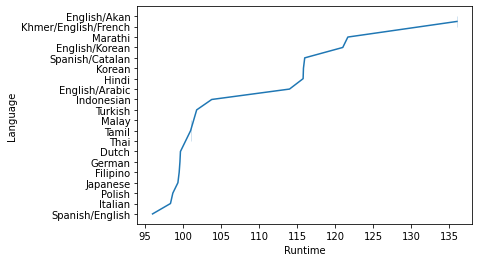

In [9]:
sns.lineplot(y=long_runtime["Language"], x=long_runtime.loc[(long_runtime["Runtime"] >= 93.58)]["Runtime"])
plt.show()

In [10]:
# Find and visualize the IMDB values ​​of the movies shot in the 'Documentary' genre between January 2019 and June 2020.

df["new_date_form"] = pd.to_datetime(df.Premiere)
df["new_date_form"].head()

0   2019-08-05
1   2020-08-21
2   2019-12-26
3   2018-01-19
4   2020-10-30
Name: new_date_form, dtype: datetime64[ns]

In [11]:
IMDB_documentary = df.loc[(df['Genre'] == 'Documentary') & (df['new_date_form'] >= "2019-01-31") & (df['new_date_form'] <= "2020-06-01")]
IMDB_documentary.sort_values(by="new_date_form", ascending=True)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,new_date_form
511,ReMastered: The Two Killings of Sam Cooke,Documentary,"February 8, 2019",64,7.300,English,2019-02-08
524,Period. End of Sentence.,Documentary,"February 12, 2019",26,7.400,English/Hindi,2019-02-12
324,Antoine Griezmann: The Making of a Legend,Documentary,"March 21, 2019",60,6.500,French,2019-03-21
444,ReMastered: The Miami Showband Massacre,Documentary,"March 22, 2019",70,7.000,English,2019-03-22
286,The Legend of Cocaine Island,Documentary,"March 29, 2019",87,6.300,English,2019-03-29
536,Homecoming: A Film by Beyonce,Documentary,"April 17, 2019",137,7.500,English,2019-04-17
554,Brene Brown: The Call to Courage,Documentary,"April 19, 2019",76,7.700,English,2019-04-19
462,Grass Is Greener,Documentary,"April 20, 2019",97,7.100,English,2019-04-20
442,ReMastered: Devil at the Crossroads,Documentary,"April 26, 2019",48,7.000,English,2019-04-26
466,Knock Down the House,Documentary,"May 1, 2019",87,7.100,English,2019-05-01


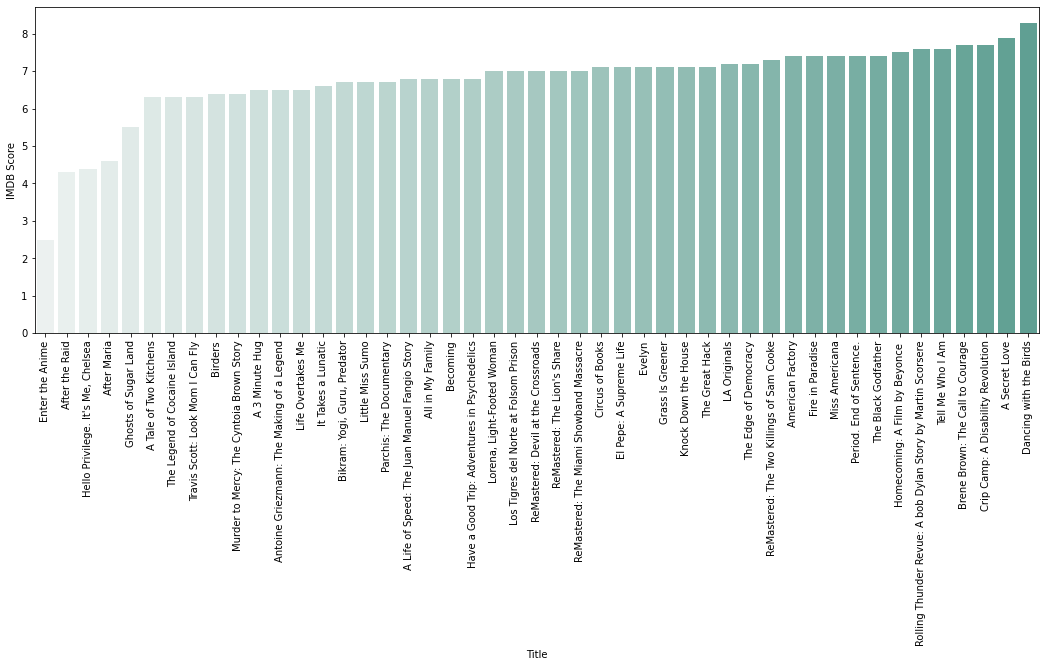

In [12]:
plt.figure(figsize=(18, 6))
plt.xticks(rotation = 90)
sns.barplot(x = IMDB_documentary["Title"], y= IMDB_documentary["IMDB Score"], palette = "light:#5A9")
plt.show()

In [13]:
# Which genre has the highest IMDB rating among English-language films?

eng_movies = df.loc[(df["Language"] == "English")]
eng_movies.sort_values(["IMDB Score"], ascending = False)[:1]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,new_date_form
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.000,English,2020-10-04


In [14]:
# What is the average 'runtime' of the films made in the 'Hindi' Language?

hindi_lang = df[df["Language"]=="Hindi"]
round(hindi_lang["Runtime"].mean(), 2)

115.79

In [15]:
# How many categories does the 'Genre' column have and what are these categories? 

df.Genre.nunique()

115

In [16]:
df.Genre.unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

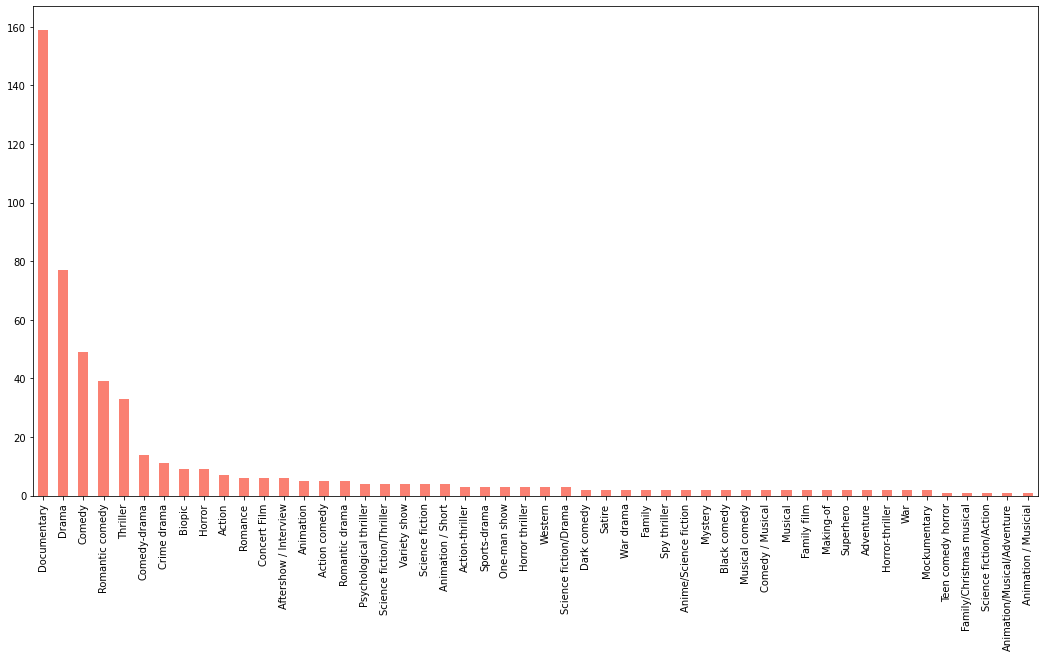

In [17]:
genre_top40 = df["Genre"].value_counts().nlargest(50)
genre_top40.plot(kind='bar', figsize=(18, 9), color="salmon")
plt.show()

In [18]:
# Find the 3 most used languages in the movies found in the dataset.

top_3_language = df["Language"].value_counts().nlargest(3)
top_3_language

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

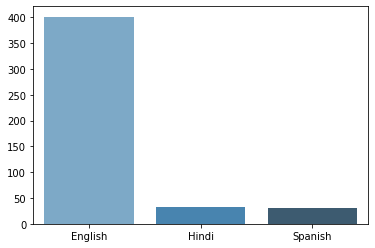

In [19]:
sns.barplot(x=top_3_language.index, y=top_3_language.values, palette="Blues_d")
plt.show()

In [20]:
# Which are the top 10 movies with the highest IMDB rating?

top_10_movies = df[["IMDB Score", "Title", "Genre", "Language"]]
top_10_movies.sort_values(["IMDB Score"], ascending=False)[:10]

,IMDB Score,Title,Genre,Language
583,9.000,David Attenborough: A Life on Our Planet,Documentary,English
582,8.600,Emicida: AmarElo - It's All For Yesterday,Documentary,Portuguese
581,8.500,Springsteen on Broadway,One-man show,English
580,8.400,Winter on Fire: Ukraine's Fight for Freedom,Documentary,English/Ukranian/Russian
579,8.400,Taylor Swift: Reputation Stadium Tour,Concert Film,English
578,8.400,Ben Platt: Live from Radio City Music Hall,Concert Film,English
577,8.300,Dancing with the Birds,Documentary,English
576,8.300,Cuba and the Cameraman,Documentary,English
573,8.200,Klaus,Animation/Christmas/Comedy/Adventure,English
571,8.200,13th,Documentary,English


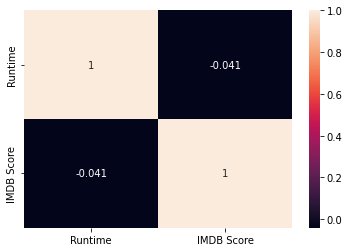

In [21]:
# How is there a correlation Dec IMDB score and 'Runtime'? 

sns.heatmap(df.corr(), annot=True)
plt.show()

In [22]:
# Which are the top 10 'Genres' with the highest IMDB Score? 

top_10_genres = df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10].reset_index()
top_10_genres

,Genre,IMDB Score
0,Documentary,9.000
1,One-man show,8.500
2,Concert Film,8.400
3,Animation/Christmas/Comedy/Adventure,8.200
4,Drama,7.900
5,Animation / Short,7.800
6,Crime drama,7.800
7,Musical / Short,7.700
8,Making-of,7.700
9,War drama,7.700


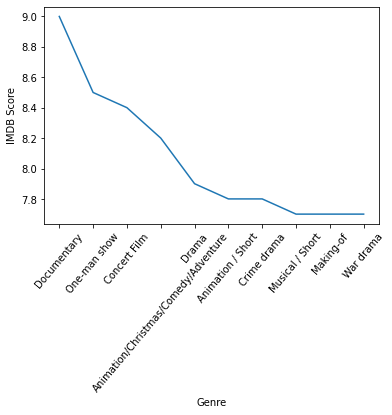

In [23]:
sns.lineplot(y = top_10_genres["IMDB Score"], x = top_10_genres["Genre"])
plt.xticks(rotation = 50)
plt.show()

In [24]:
# What are the top 10 movies with the highest 'runtime' value? 

top_10_runtime = df.groupby("Title")["Runtime"].max().sort_values(ascending = False)[:10]
top_10_runtime

Title
The Irishman                       209
Da 5 Bloods                        155
Springsteen on Broadway            153
The Forest of Love                 151
Citation                           151
Raat Akeli Hai                     149
The Last Days of American Crime    149
Ludo                               149
Army of the Dead                   148
Drive                              147
Name: Runtime, dtype: int64

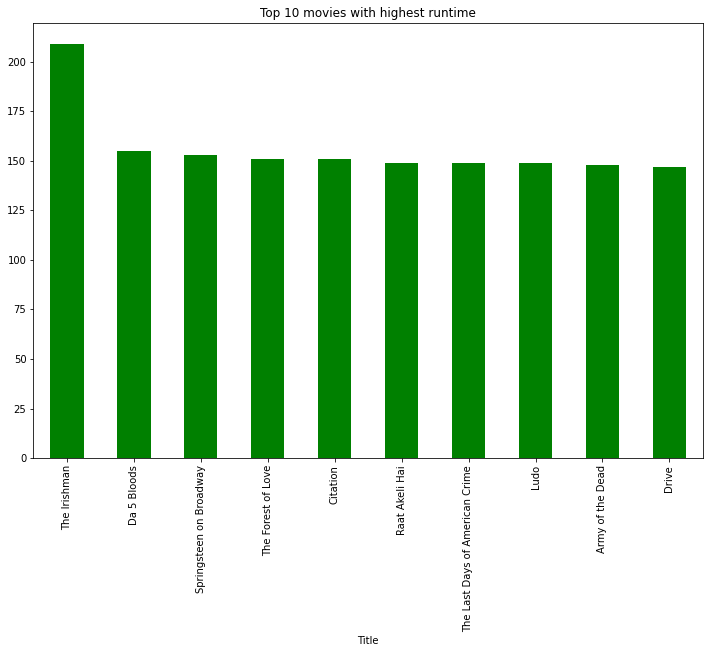

In [25]:
plt.figure(figsize=(12,8))
top_10_runtime.plot(kind="bar",color = "g", title = "Top 10 movies with highest runtime");

In [26]:
# In which year was the most movies released? 
df["Premiere"] = pd.to_datetime(df["Premiere"])
df["Year"] = df["Premiere"].apply(lambda x: x.year)
df["Month"] = df["Premiere"].apply(lambda x: x.month)
df["Day"] = df["Premiere"].apply(lambda x: x.day)

freq_year = df["Year"].value_counts()

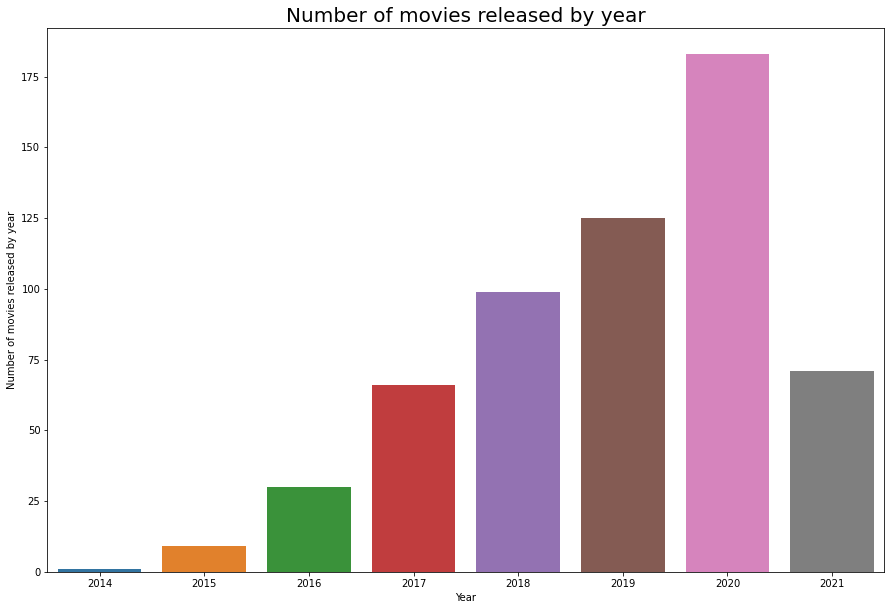

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x = freq_year.index,y=freq_year.values)
plt.title("Number of movies released by year",fontsize = 20)
plt.xlabel("Year")
plt.ylabel("Number of movies released by year")
plt.show()

In [28]:
# Which language films have the lowest average IMDB rating?

lowest_imdb = df.groupby("Language")["IMDB Score"].mean().sort_values()
print(lowest_imdb)

Language
Malay                        4.200
English/Japanese             4.400
Norwegian                    5.100
Filipino                     5.100
Polish                       5.167
Thai                         5.450
Swedish                      5.500
Italian                      5.543
Spanish/Basque               5.600
German                       5.640
Turkish                      5.660
French                       5.770
Dutch                        5.800
Indonesian                   5.844
Korean                       5.917
Hindi                        5.982
Marathi                      6.067
Portuguese                   6.217
English/Spanish              6.220
Spanish                      6.303
English                      6.380
Japanese                     6.400
Spanish/Catalan              6.400
English/Taiwanese/Mandarin   6.500
English/Swedish              6.500
Thia/English                 6.700
Georgian                     6.800
English/Mandarin             7.050
Bengali    

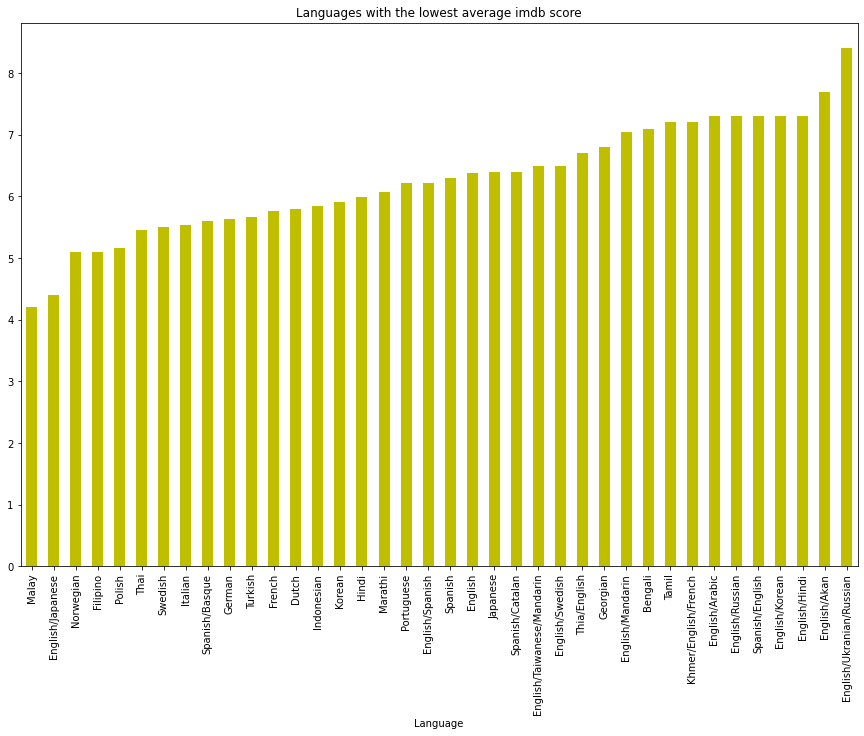

In [29]:
plt.figure(figsize=(15,10))
lowest_imdb.plot(kind="bar",color = "y", title = "Languages with the lowest average imdb score")
plt.show()

In [30]:
# Which year has the total highest"runtime" time?

df.groupby("Premiere").agg({'Runtime': "sum"}).sort_values(by="Runtime", ascending=False)[0:1]

,Runtime
Premiere,
2020-10-02,600


In [31]:
# What is the "Genre" where each language is used the most?

genre = df.groupby(["Language"])["Genre"].value_counts(sort=True).groupby(level=0).head(1)

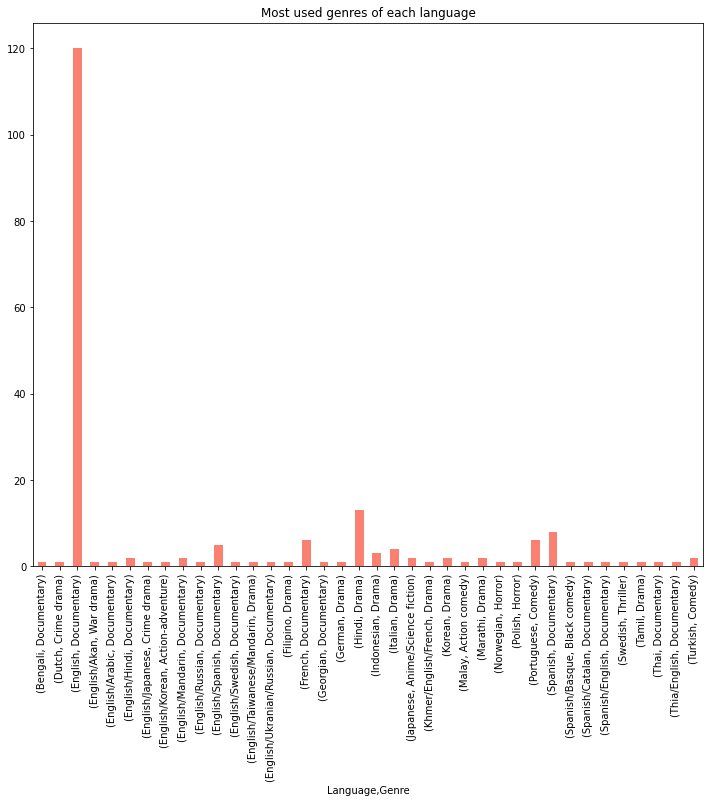

In [39]:
plt.figure(figsize=(12,10))
genre.plot(kind="bar",color = "salmon", title = "Most used genres of each language")
plt.show()

In [33]:
# Is there any outlier data in the data set?

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)

In [34]:
def outlier_thresholds(dataframe, col_name, q1= 0.1, q3= 0.9):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    IQR = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * IQR
    low_limit = quartile1 - 1.5 * IQR
    print(f"{col_name} low_ limit: {low_limit}")
    print(f"{col_name} up_ limit: {up_limit}")
    return low_limit, up_limit

outlier_thresholds(df, "Runtime")
outlier_thresholds(df, "IMDB Score")

Runtime low_ limit: -54.74999999999998
Runtime up_ limit: 228.04999999999998
IMDB Score low_ limit: 1.475
IMDB Score up_ limit: 10.955


(1.475, 10.955)

In [35]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis = None):
        print(dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)])
    else:
        False

In [36]:
check_outlier(df, "Runtime")

Runtime low_ limit: -54.74999999999998
Runtime up_ limit: 228.04999999999998


In [37]:
check_outlier(df, "IMDB Score")

IMDB Score low_ limit: 1.475
IMDB Score up_ limit: 10.955


In [38]:
for col in num_cols:
    print(col, check_outlier(df, col))

Premiere low_ limit: 2011-09-13 04:48:00
Premiere up_ limit: 2026-09-11 00:00:00
Premiere None
Runtime low_ limit: -54.74999999999998
Runtime up_ limit: 228.04999999999998
Runtime None
IMDB Score low_ limit: 1.475
IMDB Score up_ limit: 10.955
IMDB Score None
new_date_form low_ limit: 2011-09-13 04:48:00
new_date_form up_ limit: 2026-09-11 00:00:00
new_date_form None
Year low_ limit: 2011.0
Year up_ limit: 2027.0
Year None
Month low_ limit: -11.5
Month up_ limit: 24.5
Month None
Day low_ limit: -32.0
Day up_ limit: 64.0
Day None
